# Linear SVM - Raisin Dataset

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
data = pd.read_excel('C:/Users/Dell/Downloads/Raisin_Dataset.xlsx', sheet_name = 'Raisin_Dataset')
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [36]:
data.Class.value_counts()

Besni      450
Kecimen    450
Name: Class, dtype: int64

In [37]:
data['Class'] = data['Class'].map({'Kecimen':1, 'Besni': 0 })
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


In [38]:
data.Class.value_counts()

0    450
1    450
Name: Class, dtype: int64

In [39]:
data.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [40]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636,0.500000
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315,0.500278
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000,0.000000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750,0.000000
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000,0.500000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750,1.000000
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000,1.000000


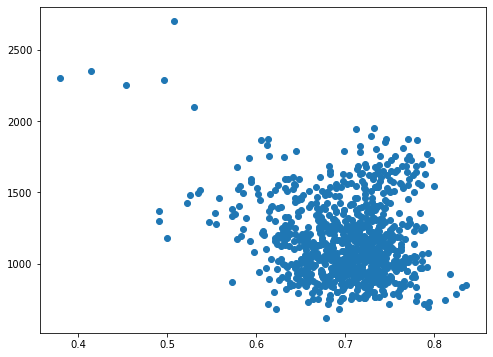

In [41]:
plt.figure(figsize = (8,6))
plt.scatter(data['Extent'],data['Perimeter'])
plt.show()

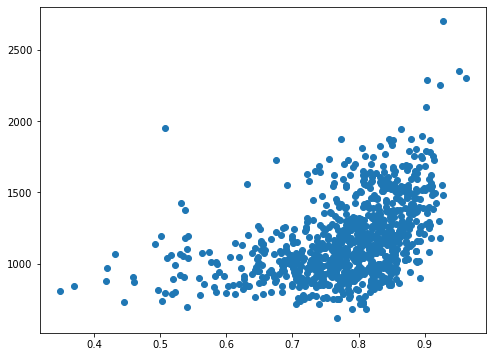

In [42]:
plt.figure(figsize = (8,6))
plt.scatter(data['Eccentricity'],data['Perimeter'])
plt.show()

In [43]:
# Scaling the data
x = data.drop(['Class'], axis = 1)
y = data['Class']

scaler = StandardScaler()
X = scaler.fit_transform(x)
x = pd.DataFrame(X, columns = x.columns)
x.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,-0.007186,0.097577,-0.023958,0.423142,-0.015709,1.106743,0.066274
1,-0.324217,-0.209012,-0.229292,0.224476,-0.304248,-0.287777,-0.161252
2,0.078292,0.097758,0.236988,0.186239,0.062113,-1.158250,0.155945
3,-1.074286,-1.245051,-0.915273,-1.069623,-1.076165,0.001711,-1.175915
4,-0.215393,-0.678958,0.727354,-2.409827,-0.238623,1.745259,-0.338639


In [44]:
# Splitting the data
x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size = 0.2)
x_tr.shape, x_test.shape, y_tr.shape, y_test.shape

((720, 7), (180, 7), (720,), (180,))

In [51]:
# SVM
linear_svm = SVC(kernel = 'linear')
l_svm = linear_svm.fit(x_tr, y_tr)

In [52]:
pred = linear_svm.predict(x_test)

In [53]:
# Confusion
c_m = confusion_matrix(y_test, pred)
print(c_m)

[[74 15]
 [12 79]]


In [54]:
# Classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        89
           1       0.84      0.87      0.85        91

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



In [55]:
# using cross validation
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(l_svm, x, y, cv = 5)

In [56]:
scores

array([0.9       , 0.88333333, 0.86111111, 0.86111111, 0.85      ])

In [57]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.87 accuracy with a standard deviation of 0.02
